In [1]:
from bokeh.io import output_notebook, show, export_svg
from bokeh.plotting import figure
from bokeh.models import Range1d, ColumnDataSource, LabelSet

output_notebook(hide_banner=True)

from IPython.display import SVG, display
from pathlib import Path
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from pathlib import Path

In [2]:
FIGURES_DIR = Path("figures") / Path("datasets-cls-dist")
FIGURES_DIR.mkdir(exist_ok=True, parents=True)

SHORT_LABELS = ["osoba", "miasto", "kraj", "O"]

In [3]:
LEAST_CONF_MDIR = "../runs/test_threshold_least_confidence_50i_50n_kpwr_1670695943f865506/models"
LEAST_CONF_MNAMES = [
    "model_14it_1020spans.spacy",
    "model_27it_2016spans.spacy",
    "model_41it_3040spans.spacy",
    "model_51it_3812spans.spacy"
]
LEAST_CONF_CLS_DISTRIB = [
    {"nam_liv_person": 581, "nam_loc_gpe_city": 234, "nam_loc_gpe_country": 205},
    {"nam_liv_person": 1129, "nam_loc_gpe_city": 475, "nam_loc_gpe_country": 412},
    {"nam_liv_person": 1690, "nam_loc_gpe_city": 746, "nam_loc_gpe_country": 604},
    {"nam_liv_person": 2130, "nam_loc_gpe_city": 942, "nam_loc_gpe_country": 740}
]

In [4]:
RAND_MDIR = "../runs/random_50i_50n_kpwr-full_1669041088f13043/models"
RAND_MNAMES = [
    "model_14it_1023spans.spacy",
    "model_27it_2007spans.spacy",
    "model_40it_3005spans.spacy",
    "model_51it_3844spans.spacy"
]
RAND_CLS_DISTRIB = [
    {"nam_liv_person": 527, "nam_loc_gpe_city": 263, "nam_loc_gpe_country": 233},
    {"nam_liv_person": 1075, "nam_loc_gpe_city": 510, "nam_loc_gpe_country": 422},
    {"nam_liv_person": 1663, "nam_loc_gpe_city": 750, "nam_loc_gpe_country": 592},
    {"nam_liv_person": 2153, "nam_loc_gpe_country": 725, "nam_loc_gpe_city": 966}
]

In [5]:
def shorten(label):
    if label == "nam_liv_person":
        return "osoba"
    if label == "nam_loc_gpe_city":
        return "miasto"
    if label == "nam_loc_gpe_country":
        return "kraj"

## Class distribution in test dataset

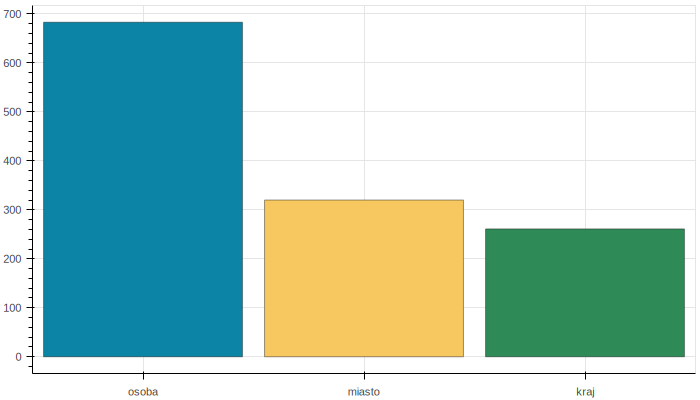

In [6]:
colors = ["#0B84A5", "#F6C85F", "seagreen"]

test_classes = ["osoba", "miasto", "kraj"]
test_counts = [683, 320, 261]

p = figure(x_range=test_classes,
           width=700,
           height=400,
           output_backend="svg")

p.vbar(x=test_classes, top=test_counts, color=colors, width=0.9, line_color="black", line_alpha=0.4)

out_path = FIGURES_DIR / f"bokeh_test_dataset_class_distribution.svg"
p.toolbar_location = None
export_svg(p, filename=out_path)
display(SVG(filename=out_path))

model_14it_1023spans.spacy


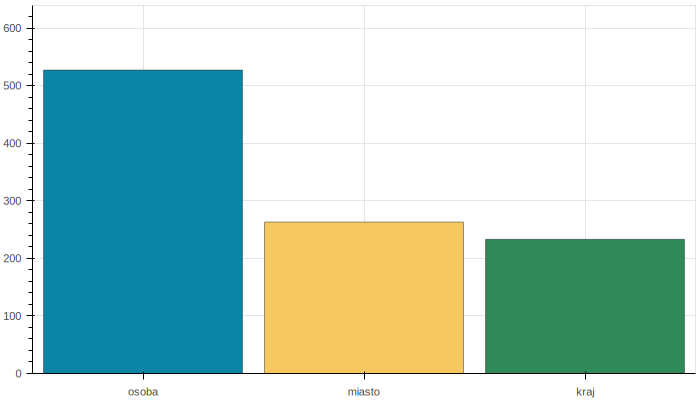

model_14it_1020spans.spacy


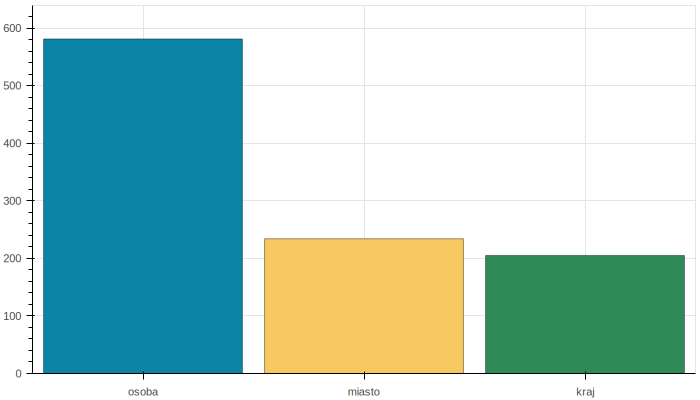

In [15]:
for rand_mname, lconf_mname, rand_cls_dist, lconf_cls_dist in zip(
        RAND_MNAMES, LEAST_CONF_MNAMES,
        RAND_CLS_DISTRIB, LEAST_CONF_CLS_DISTRIB
):
    rand_classes = list([shorten(label) for label in rand_cls_dist.keys()])
    rand_counts = list(rand_cls_dist.values())

    lconf_classes = list([shorten(label) for label in lconf_cls_dist.keys()])
    lconf_counts = list(lconf_cls_dist.values())

    max_y = max(rand_counts+lconf_counts)
    max_y = max_y * 1.1

    p = figure(x_range=rand_classes,
               width=700,
               height=400,
               output_backend="svg")
    p.y_range = Range1d(0, max_y)
    p.xaxis.axis_label_text_font_size = '30pt'
    p.yaxis.axis_label_text_font_size = '30pt'

    p.vbar(x=rand_classes, top=rand_counts, color=colors, width=0.9, line_color="black", line_alpha=0.4)

    out_path = FIGURES_DIR / f"bokeh_rand_class_distribution_{rand_mname}.svg"
    p.toolbar_location = None
    export_svg(p, filename=out_path)
    print(rand_mname)
    display(SVG(filename=out_path))

    p = figure(x_range=lconf_classes,
               width=700,
               height=400,
               output_backend="svg")
    p.y_range = Range1d(0, max_y)
    p.xaxis.axis_label_text_font_size = '30pt'
    p.yaxis.axis_label_text_font_size = '30pt'

    p.vbar(x=lconf_classes, top=lconf_counts, color=colors, width=0.9, line_color="black", line_alpha=0.4)

    out_path = FIGURES_DIR / f"bokeh_lconf_class_distribution_{lconf_mname}.svg"
    p.toolbar_location = None
    export_svg(p, filename=out_path)
    print(lconf_mname)
    display(SVG(filename=out_path))

    break

In [ ]:
assert False

## Class distribution in gradually expanding dataset

In [ ]:
sns.set(font_scale=1)
for rand_mname, lconf_mname, rand_cls_dist, lconf_cls_dist in zip(
        RAND_MNAMES, LEAST_CONF_MNAMES,
        RAND_CLS_DISTRIB, LEAST_CONF_CLS_DISTRIB
):
    rand_classes = list([shorten(label) for label in rand_cls_dist.keys()])
    rand_counts = list(rand_cls_dist.values())

    lconf_classes = list([shorten(label) for label in lconf_cls_dist.keys()])
    lconf_counts = list(lconf_cls_dist.values())

    max_y = max(rand_counts+lconf_counts)
    max_y = max_y * 1.1


    rand_bar = sns.barplot(x=rand_classes, y=rand_counts)

    plt.ylim(0, max_y)
    plt.savefig(FIGURES_DIR / f"pl_rand_class_distribution_{rand_mname}.svg")
    print("rand_" + rand_mname)
    plt.show()


    lconf_bar = sns.barplot(x=lconf_classes, y=lconf_counts)

    plt.ylim(0, max_y)
#     plt.tick_params(left = False , labelleft = False)
    plt.savefig(FIGURES_DIR / f"03_threshold_pl_lconf_class_distribution_{lconf_mname}.svg")
    print("lconf_" + lconf_mname)
    plt.show()
